<a href="https://colab.research.google.com/github/MikhailSamuel/My-Projects/blob/main/Copy_of_SQL_Data_Analysis_Excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis with SQL, Pandas, and SQLite (Northwind)

This notebook focuses on **data analysis using SQL**, with the help of **pandas** and **matplotlib**.

## 0. Environment Setup

In this section we:
- Import required libraries
- Download the Northwind SQLite database
- Connect to it and inspect the schema

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Download the sample Northwind SQLite database
!wget -q https://www.timestored.com/data/sample/northwind_small.sqlite -O northwind.sqlite

# Connect to SQLite
conn = sqlite3.connect('northwind.sqlite')
print('Connected to northwind.sqlite')

Connected to northwind.sqlite


### 0.1 Inspect the database

Let's see what tables exist in the database.

In [ ]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;", conn)
tables

,name
0,Category
1,Customer
2,CustomerCustomerDemo
3,CustomerDemographic
4,Employee
5,EmployeeTerritory
6,Order
7,OrderDetail
8,Product
9,Region


Now let's peek at some key tables: `Customer`, `Employee`, `Order`, `OrderDetail`.

In [ ]:
for table in ['Customer', 'Employee', 'Order', 'OrderDetail']:
    print(f"\n=== {table} ===")
    display(pd.read_sql_query(f'SELECT * FROM "{table}" LIMIT 5;', conn))


=== Customer ===


,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67



=== Employee ===


,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp



=== Order ===


,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium



=== OrderDetail ===


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


## 1. Using Pandas with SQL

### 1.1 `pd.read_sql_query`

The main function we will use is:

```python
pd.read_sql_query(sql, conn)
```

- `sql` is a string containing your SQL query
- `conn` is a SQLite connection (`sqlite3.connect(...)`)
- The result is a **pandas DataFrame**

Example:
```python
sql = "SELECT Id, CompanyName, Country FROM Customer LIMIT 10;"
df = pd.read_sql_query(sql, conn)
df.head()
```

In [ ]:
# Example: simple SELECT using pandas + SQL
sql = "SELECT Id, CompanyName, Country FROM Customer LIMIT 10;"
df_customers = pd.read_sql_query(sql, conn)
df_customers

,Id,CompanyName,Country
0,ALFKI,Alfreds Futterkiste,Germany
1,ANATR,Ana Trujillo Emparedados y helados,Mexico
2,ANTON,Antonio Moreno Taquería,Mexico
3,AROUT,Around the Horn,UK
4,BERGS,Berglunds snabbköp,Sweden
5,BLAUS,Blauer See Delikatessen,Germany
6,BLONP,Blondesddsl père et fils,France
7,BOLID,Bólido Comidas preparadas,Spain
8,BONAP,Bon app,France
9,BOTTM,Bottom-Dollar Markets,Canada


### 1.2 Parameterized queries

Sometimes you want to substitute values safely into queries. With SQLite and pandas, you can:

```python
country = 'Germany'
sql = "SELECT * FROM Customer WHERE Country = ?;"
df = pd.read_sql_query(sql, conn, params=[country])
```

This avoids string concatenation and is safer and cleaner.

In [ ]:
# Example: parameterized query
country = 'Germany'
sql = "SELECT Id, CompanyName, City, Country FROM Customer WHERE Country = ? LIMIT 10;"
df_germany = pd.read_sql_query(sql, conn, params=[country])
df_germany

,Id,CompanyName,City,Country
0,ALFKI,Alfreds Futterkiste,Berlin,Germany
1,BLAUS,Blauer See Delikatessen,Mannheim,Germany
2,DRACD,Drachenblut Delikatessen,Aachen,Germany
3,FRANK,Frankenversand,München,Germany
4,KOENE,Königlich Essen,Brandenburg,Germany
5,LEHMS,Lehmanns Marktstand,Frankfurt a.M.,Germany
6,MORGK,Morgenstern Gesundkost,Leipzig,Germany
7,OTTIK,Ottilies Käseladen,Köln,Germany
8,QUICK,QUICK-Stop,Cunewalde,Germany
9,TOMSP,Toms Spezialitäten,Münster,Germany


## 2. Sales Metric: `LineTotal`

Most of our analysis will use a basic **sales amount** defined per order line as:

```sql
LineTotal = UnitPrice * Quantity * (1 - Discount)
```

Using:
- `OrderDetail.UnitPrice`
- `OrderDetail.Quantity`
- `OrderDetail.Discount`

We will combine:
- `Order` (for dates, customer, employee, shipping info)
- `OrderDetail` (for line amounts)
- sometimes `Customer` and `Employee` for dimensions like region/country.

## 3. Example Visualizations


### 3.1 Total sales over time (by day)

We'll:
1. Join `Order` and `OrderDetail`
2. Compute `LineTotal`
3. Group by `OrderDate` and sum up totals
4. Load into pandas and plot a time series

In [ ]:
sql_total_sales_by_day = """
SELECT
  o.OrderDate,
  strftime('%Y-%W', o.OrderDate) AS OrderWeek,
  SUM(od.UnitPrice * od.Quantity * (1 - od.Discount)) AS TotalSales
FROM "Order" o
JOIN OrderDetail od ON o.Id = od.OrderId
GROUP BY OrderWeek
ORDER BY o.OrderDate;
"""

df_sales_by_day = pd.read_sql_query(sql_total_sales_by_day, conn)
df_sales_by_day

,OrderDate,OrderWeek,TotalSales
0,2012-07-04,2012-27,4510.0600
1,2012-07-09,2012-28,8607.6200
2,2012-07-16,2012-29,5372.2300
3,2012-07-23,2012-30,7628.5850
4,2012-07-30,2012-31,6660.6800
...,...,...,...
94,2014-04-07,2014-14,23665.1950
95,2014-04-14,2014-15,48561.7250
96,2014-04-21,2014-16,16707.7250
97,2014-04-28,2014-17,18961.3500


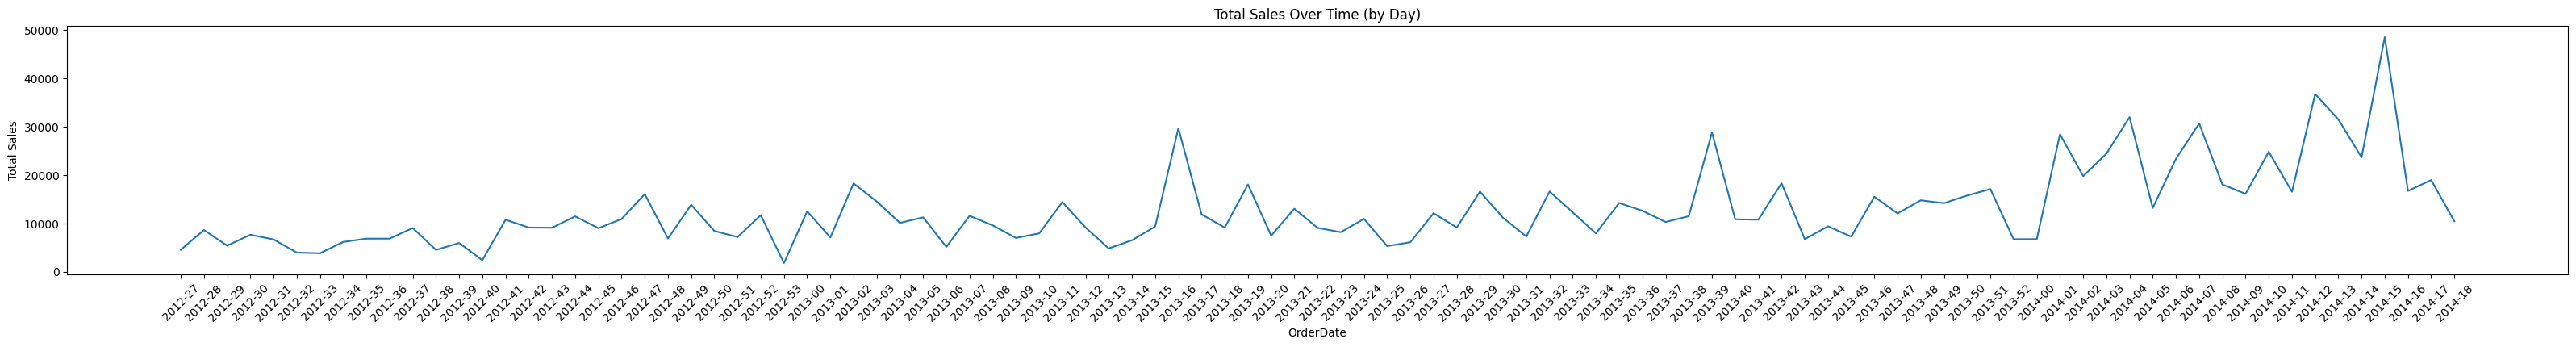

In [ ]:
# Plot total sales over time (by day)
plt.figure(figsize=(40, 4))
plt.plot(df_sales_by_day['OrderWeek'], df_sales_by_day['TotalSales'])
plt.title('Total Sales Over Time (by Day)')
plt.xlabel('OrderDate')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Excercise -- try to fix the graph by aggregating by weeks instead of days

### 3.2 Top 10 customers by total sales

Now let's find the **top 10 customers** by total sales.

Steps:
1. Join `Order`, `OrderDetail`, and `Customer`
2. Compute `LineTotal` per order line
3. Group by `CustomerId` (and maybe `CompanyName`)
4. Sort by total sales descending and take top 10
5. Plot a bar chart

In [ ]:
sql_top_customers = """
SELECT
  c.Id AS CustomerId,
  c.CompanyName,
  SUM(od.UnitPrice * od.Quantity * (1 - od.Discount)) AS TotalSales
FROM "Order" o
JOIN OrderDetail od ON o.Id = od.OrderId
JOIN Customer c ON o.CustomerId = c.Id
GROUP BY c.Id, c.CompanyName
ORDER BY TotalSales DESC
LIMIT 100;
"""

df_top_customers = pd.read_sql_query(sql_top_customers, conn)
df_top_customers

,CustomerId,CompanyName,TotalSales
0,QUICK,QUICK-Stop,110277.3050
1,ERNSH,Ernst Handel,104874.9785
2,SAVEA,Save-a-lot Markets,104361.9500
3,RATTC,Rattlesnake Canyon Grocery,51097.8005
4,HUNGO,Hungry Owl All-Night Grocers,49979.9050
...,...,...,...
80,GALED,Galería del gastrónomo,836.7000
81,NORTS,North/South,649.0000
82,LAUGB,Laughing Bacchus Wine Cellars,522.5000
83,LAZYK,Lazy K Kountry Store,357.0000


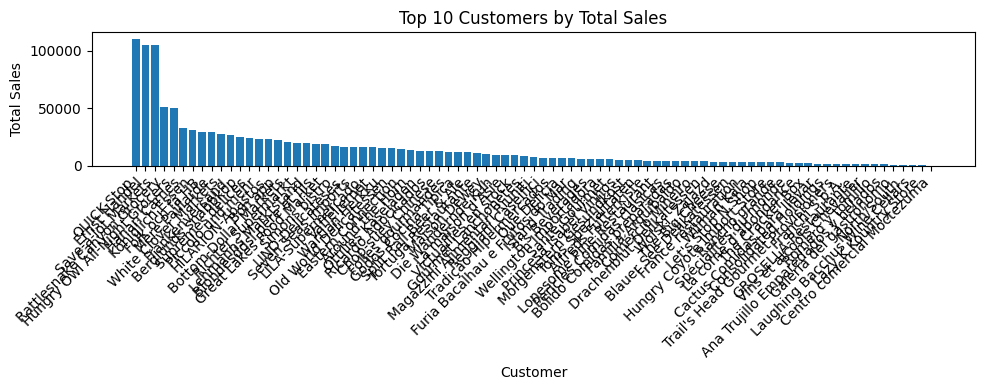

In [ ]:
# Plot top 10 customers by total sales
plt.figure(figsize=(10, 4))
plt.bar(df_top_customers['CompanyName'], df_top_customers['TotalSales'])
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Customer')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 3.3 Total sales by customer country

Next, let's aggregate sales by **customer country**.

Steps:
1. Same join as before (`Order` + `OrderDetail` + `Customer`)
2. Group by `Customer.Country`
3. Plot the top N countries as a bar chart.

In [ ]:
sql_sales_by_country = """
SELECT
  c.Country,
  SUM(od.UnitPrice * od.Quantity * (1 - od.Discount)) AS TotalSales
FROM "Order" o
JOIN OrderDetail od ON o.Id = od.OrderId
JOIN Customer c ON o.CustomerId = c.Id
GROUP BY c.Country
ORDER BY TotalSales DESC;
"""

df_sales_by_country = pd.read_sql_query(sql_sales_by_country, conn)
df_sales_by_country.head()

,Country,TotalSales
0,USA,245584.6105
1,Germany,230284.6335
2,Austria,128003.8385
3,Brazil,81208.2790
4,France,79742.4225


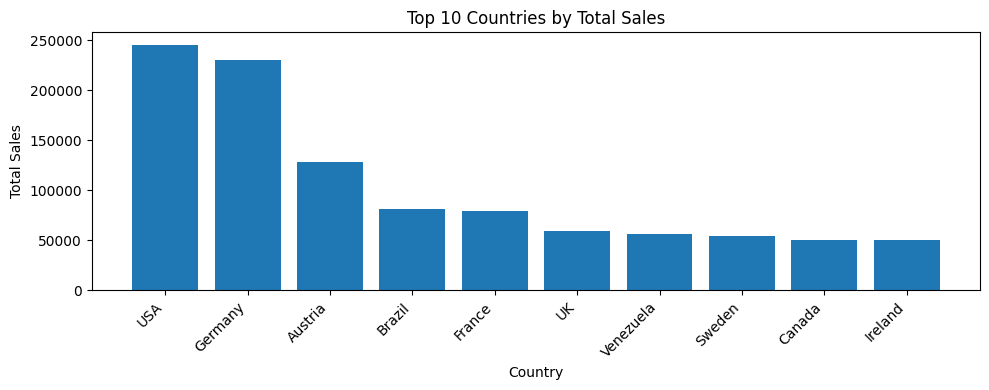

In [ ]:
# Plot top 10 countries by total sales
top_n = 10
df_top_countries = df_sales_by_country.head(top_n)

plt.figure(figsize=(10, 4))
plt.bar(df_top_countries['Country'], df_top_countries['TotalSales'])
plt.title(f'Top {top_n} Countries by Total Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 3.4 Monthly total sales

We can also **resample** sales by month. In SQLite, we can use `strftime` to extract year-month:

```sql
strftime('%Y-%m', OrderDate) AS YearMonth
```

We then group by this `YearMonth` and plot.

In [ ]:
sql_sales_by_month = """
SELECT
  strftime('%Y-%m', o.OrderDate) AS YearMonth,
  SUM(od.UnitPrice * od.Quantity * (1 - od.Discount)) AS TotalSales
FROM "Order" o
JOIN OrderDetail od ON o.Id = od.OrderId
GROUP BY YearMonth
ORDER BY YearMonth;
"""

df_sales_by_month = pd.read_sql_query(sql_sales_by_month, conn)
df_sales_by_month.head()

,YearMonth,TotalSales
0,2012-07,27861.895
1,2012-08,25485.275
2,2012-09,26381.400
3,2012-10,37515.725
4,2012-11,45600.045


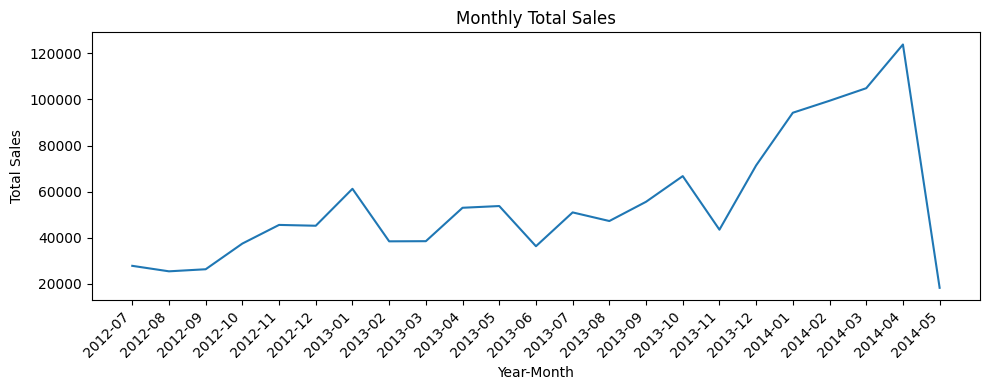

In [ ]:
# Plot monthly total sales
plt.figure(figsize=(10, 4))
plt.plot(df_sales_by_month['YearMonth'], df_sales_by_month['TotalSales'])
plt.title('Monthly Total Sales')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4. Exercises

### Exercise 1 – Basic count per customer

**Goal:**
- For each customer, count how many orders they have placed.
- Return columns: `CustomerId`, `CompanyName`, `OrderCount`.
- Sort by `OrderCount` descending and show the top 10.

**Hints:**
- Join `Order` with `Customer` on `Order.CustomerId = Customer.Id`.
- Use `COUNT(*)` and `GROUP BY`.

After getting the DataFrame, just inspect it with `.head()` (no plot needed yet).

In [ ]:
# TODO: Exercise 1
sql_ex1 = """
select c.Id as CustomerId, c.CompanyName, count(*) as OrderCount
from "Order" o
join Customer c on o.CustomerId = c.Id
group by c.Id, c.CompanyName
order by OrderCount desc
limit 10
"""

df_ex1 = pd.read_sql_query(sql_ex1, conn)
df_ex1

,CustomerId,CompanyName,OrderCount
0,SAVEA,Save-a-lot Markets,31
1,ERNSH,Ernst Handel,30
2,QUICK,QUICK-Stop,28
3,FOLKO,Folk och fä HB,19
4,HUNGO,Hungry Owl All-Night Grocers,19
5,BERGS,Berglunds snabbköp,18
6,HILAA,HILARION-Abastos,18
7,RATTC,Rattlesnake Canyon Grocery,18
8,BONAP,Bon app,17
9,FRANK,Frankenversand,15


### Exercise 2 – Average freight cost by ship country

**Goal:**
- For each `ShipCountry`, compute the **average freight**.
- Return columns: `ShipCountry`, `AvgFreight`.
- Sort by `AvgFreight` descending.
- Plot the top 10 countries as a bar chart.

**Hints:**
- Only the `Order` table is needed.
- Use `AVG(Freight)` and `GROUP BY ShipCountry`.
- Use a bar chart similar to the earlier examples.

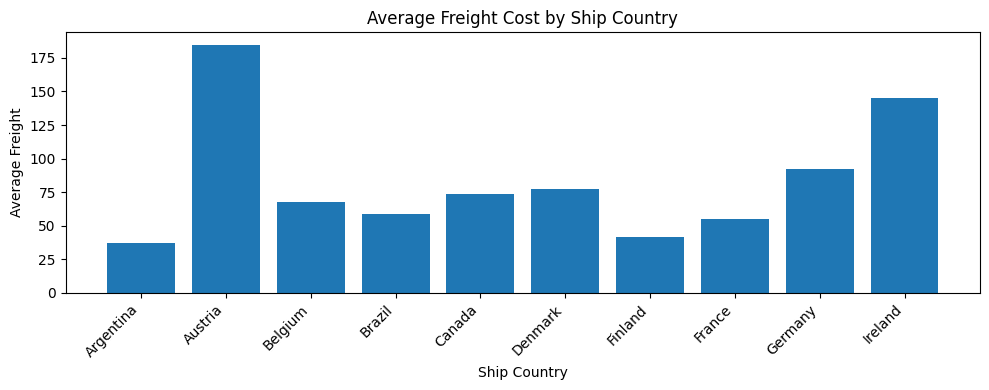

In [ ]:
# TODO: Exercise 2
sql_ex2 = """
select o.ShipCountry, avg(o.Freight) as AvgFreight
from "Order" o
group by o.ShipCountry
limit 10
"""

df_ex2 = pd.read_sql_query(sql_ex2, conn)

plt.figure(figsize=(10, 4))
plt.bar(df_ex2["ShipCountry"], df_ex2["AvgFreight"])
plt.title("Average Freight Cost by Ship Country")
plt.xlabel("Ship Country")
plt.ylabel("Average Freight")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Exercise 3 – Total sales per employee

**Goal:**
- Compute **total sales** per employee.
- Use `LineTotal = UnitPrice * Quantity * (1 - Discount)`.
- Return columns: `EmployeeId`, full employee name (e.g. `FirstName || ' ' || LastName`), `TotalSales`.
- Sort by `TotalSales` descending and plot a bar chart of all employees.

**Hints:**
- Join `Order` with `OrderDetail` and `Employee`.
- Group by `Employee.Id` and name.
- Use a bar chart similar to the customer one.

In [ ]:
# TODO: Exercise 3
sql_ex3 = """
select e.Id as EmployeeId, e.FirstName || ' ' || e.LastName as EmployeeName, sum(od.UnitPrice * od.Quantity * (1 - od.Discount)) as TotalSales
from "Order" o ,"OrderDetail" od  ,"Employee" e
where o.Id = od.OrderId and o.EmployeeId = e.Id
group by e.Id, e.FirstName, e.LastName
order by TotalSales desc
limit 10
"""
sql_ex3_2 = """
select e.Id as EmployeeId, e.FirstName || ' ' || e.LastName as EmployeeName, sum(od.UnitPrice * od.Quantity * (1 - od.Discount)) as TotalSales
from "Order" o
join OrderDetail od on o.Id = od.OrderId
join Employee e on o.EmployeeId = e.Id
group by e.Id, e.FirstName, e.LastName
order by TotalSales desc
limit 10
"""

df_ex3 = pd.read_sql_query(sql_ex3, conn)
df_ex3_2 = pd.read_sql_query(sql_ex3_2, conn)

print(df_ex3)
print(df_ex3_2)

   EmployeeId      EmployeeName   TotalSales
0           4  Margaret Peacock  232890.8460
1           3   Janet Leverling  202812.8430
2           1     Nancy Davolio  192107.6045
3           2     Andrew Fuller  166537.7550
4           8    Laura Callahan  126862.2775
5           7       Robert King  124568.2350
6           9    Anne Dodsworth   77308.0665
7           6    Michael Suyama   73913.1295
8           5   Steven Buchanan   68792.2825
   EmployeeId      EmployeeName   TotalSales
0           4  Margaret Peacock  232890.8460
1           3   Janet Leverling  202812.8430
2           1     Nancy Davolio  192107.6045
3           2     Andrew Fuller  166537.7550
4           8    Laura Callahan  126862.2775
5           7       Robert King  124568.2350
6           9    Anne Dodsworth   77308.0665
7           6    Michael Suyama   73913.1295
8           5   Steven Buchanan   68792.2825


### Exercise 4 – Monthly sales trend for a specific country

**Goal:**
- Choose a single customer `Country` (e.g. `'Germany'`).
- Compute **monthly total sales** (`YearMonth`) for orders shipped to customers in that country.
- Plot a line chart of `YearMonth` vs `TotalSales`.

**Hints:**
- Similar to the monthly example, but join with `Customer` and filter on `Customer.Country`.
- Use `strftime('%Y-%m', o.OrderDate)` as `YearMonth`.
- You can either hard-code the country in SQL or pass it as a parameter in `params=[...]`.

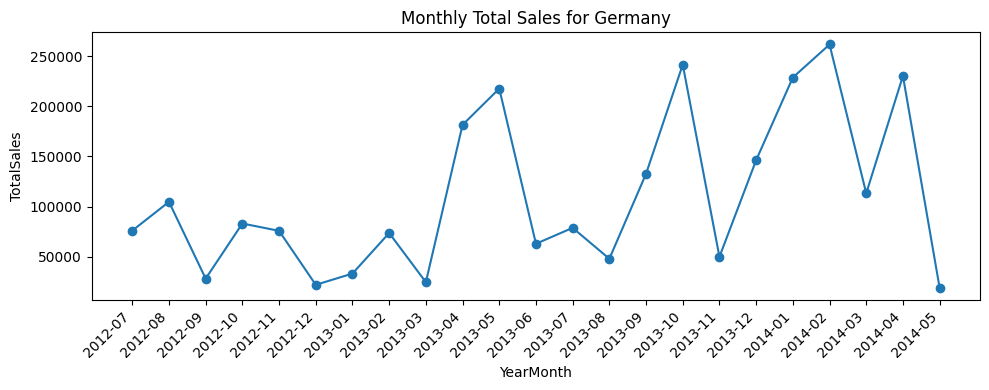

In [ ]:
# TODO: Exercise 4
country_filter = 'Germany'  # change if you like
sql_ex4 = """
SELECT
  strftime('%Y-%m', o.OrderDate) AS YearMonth,
  SUM(od.UnitPrice * od.Quantity * (1 - od.Discount)) AS TotalSales
FROM "Order" o , OrderDetail od, Customer c
WHERE o.Id = od.OrderId AND o.ShipCountry = c.Country and c.Country = ?
GROUP BY YearMonth
ORDER BY YearMonth;
"""

df_ex4 = pd.read_sql_query(sql_ex4, conn, params=[country_filter])

plt.figure(figsize=(10, 4))
plt.plot(df_ex4['YearMonth'], df_ex4['TotalSales'], marker='o', linestyle='-')
plt.title(f'Monthly Total Sales for {country_filter}')
plt.xlabel('YearMonth')
plt.ylabel('TotalSales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Exercise 5 – Customer lifetime value summary

**Goal:**
For each customer, compute:
- `FirstOrderDate`
- `LastOrderDate`
- `TotalSales` (sum of all LineTotals)

Return columns: `CustomerId`, `CompanyName`, `FirstOrderDate`, `LastOrderDate`, `TotalSales`.
Sort by `TotalSales` descending and inspect the top customers.

**Hints:**
- Use `MIN(o.OrderDate)` and `MAX(o.OrderDate)` along with `SUM(LineTotal)`.
- Join `Order`, `OrderDetail`, `Customer`.
- `GROUP BY` customer.

In [ ]:
# TODO: Exercise 5
sql_ex5 = """
select c.Id, c.CompanyName, min(o.OrderDate) as FirstOrderDate, max(o.OrderDate) as LastOrderDate ,
       sum(od.UnitPrice * od.Quantity * (1 - od.Discount)) as TotalSales
from "Order" o , Customer c , OrderDetail od
where o.CustomerId = c.Id and o.Id = od.OrderId
group by c.Id
order by TotalSales desc
"""

df_ex5 = pd.read_sql_query(sql_ex5, conn)
df_ex5.head(10)


,Id,CompanyName,FirstOrderDate,LastOrderDate,TotalSales
0,QUICK,QUICK-Stop,2012-08-05,2014-04-14,110277.3050
1,ERNSH,Ernst Handel,2012-07-17,2014-05-05,104874.9785
2,SAVEA,Save-a-lot Markets,2012-10-08,2014-05-01,104361.9500
3,RATTC,Rattlesnake Canyon Grocery,2012-07-22,2014-05-06,51097.8005
4,HUNGO,Hungry Owl All-Night Grocers,2012-09-05,2014-04-30,49979.9050
5,HANAR,Hanari Carnes,2012-07-08,2014-04-27,32841.3700
6,KOENE,Königlich Essen,2012-10-07,2014-04-16,30908.3840
7,FOLKO,Folk och fä HB,2012-07-24,2014-04-27,29567.5625
8,MEREP,Mère Paillarde,2012-10-17,2013-10-30,28872.1900
9,WHITC,White Clover Markets,2012-07-31,2014-05-01,27363.6050


### Exercise 6 – Average order value by customer country

**Goal:**
- For each **customer country**, compute the **average order value**.
- Define order value as the sum of `LineTotal` over all lines in that order.
- Then average that per country.
- Plot the top 10 countries by average order value.

**Hints:**
- This is a **two-level aggregation**:
  1. First get `OrderValue` per order (group by `Order.Id`).
  2. Then join with `Customer` and compute average per `Country`.
- Use a subquery or CTE to structure your SQL.

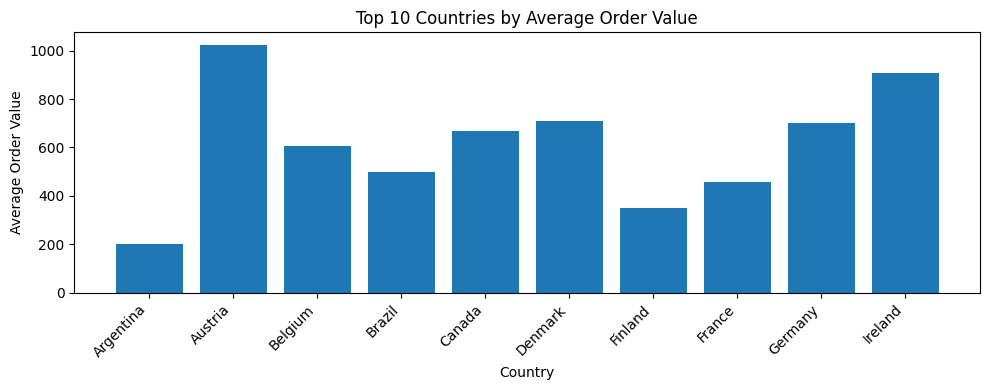

In [ ]:
# TODO: Exercise 6
sql_ex6 = """
select c.Country, avg(od.UnitPrice * od.Quantity * (1 - od.Discount)) as AvgOrderValue
from "Order" o , OrderDetail od, Customer c
where o.Id = od.OrderId and o.CustomerId = c.Id
group by c.Country
"""

# df_ex6 = pd.read_sql_query(sql_ex6, conn)
# df_ex6.head()

df_ex6 = pd.read_sql_query(sql_ex6, conn)
df_ex6.head()

top_n = 10
df_ex6_top = df_ex6.head(top_n)

plt.figure(figsize=(10, 4))
plt.bar(df_ex6_top["Country"], df_ex6_top["AvgOrderValue"])
plt.title("Top 10 Countries by Average Order Value")
plt.xlabel("Country")
plt.ylabel("Average Order Value")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Exercise 7 – Discount analysis by employee

**Goal:**
- For each employee, compute:
  - `TotalSales`
  - `AvgDiscount` (average discount over all their order lines)
- Return columns: `EmployeeId`, employee name, `TotalSales`, `AvgDiscount`.
- Sort primarily by `TotalSales` descending.

**Hints:**
- Join `Order` + `OrderDetail` + `Employee`.
- `AVG(Discount)` and `SUM(LineTotal)` in the same `GROUP BY`.

In [ ]:
# TODO: Exercise 7
sql_ex7 = """
select e.Id as EmployeeId, e.FirstName || ' ' || e.LastName as EmployeeName,
      sum(od.UnitPrice * od.Quantity * (1 - od.Discount)) as TotalSales,
      avg(od.Discount) as AvgDiscount
from "Order" o , OrderDetail od, Employee e
where o.Id = od.OrderId and o.EmployeeId = e.Id
group by e.Id
order by TotalSales desc
"""

df_ex7 = pd.read_sql_query(sql_ex7, conn)
df_ex7

,EmployeeId,EmployeeName,TotalSales,AvgDiscount
0,4,Margaret Peacock,232890.8460,0.061310
1,3,Janet Leverling,202812.8430,0.049688
2,1,Nancy Davolio,192107.6045,0.049246
3,2,Andrew Fuller,166537.7550,0.043776
4,8,Laura Callahan,126862.2775,0.056154
5,7,Robert King,124568.2350,0.073580
6,9,Anne Dodsworth,77308.0665,0.068224
7,6,Michael Suyama,73913.1295,0.054464
8,5,Steven Buchanan,68792.2825,0.066667


### Exercise 8 – Year-over-year sales trend

**Goal:**
- Compute **total sales per year** (calendar year).
- Plot a line chart of `Year` vs `TotalSales`.

**Hints:**
- Use `strftime('%Y', o.OrderDate)` to extract the year.
- Group by `Year`.
- Similar idea to the monthly plot, but with years.

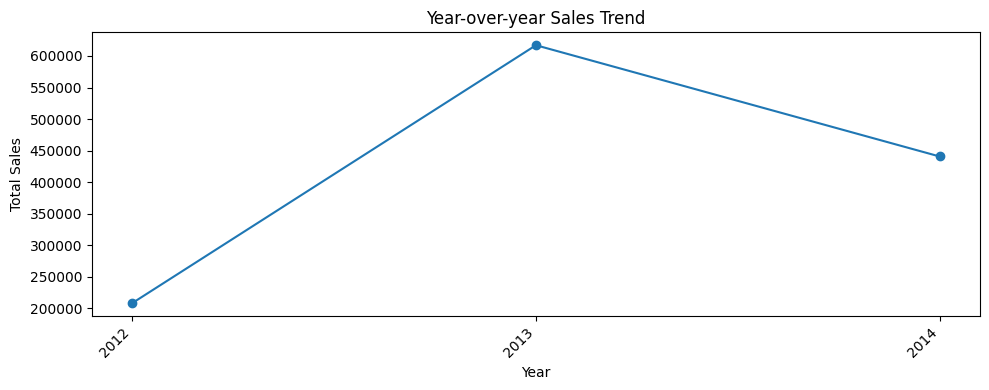

In [ ]:
# TODO: Exercise 8
sql_ex8 = """
select strftime('%Y', o.OrderDate) as Year,
      sum(od.UnitPrice * od.Quantity * (1 - od.Discount)) as TotalSales
from "Order" o , OrderDetail od
where o.Id = od.OrderId
group by Year
order by Year
"""

df_ex8 = pd.read_sql_query(sql_ex8, conn)
df_ex8

plt.figure(figsize=(10, 4))
plt.plot(df_ex8["Year"], df_ex8["TotalSales"], marker='o')
plt.title("Year-over-year Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Northwind Database ERD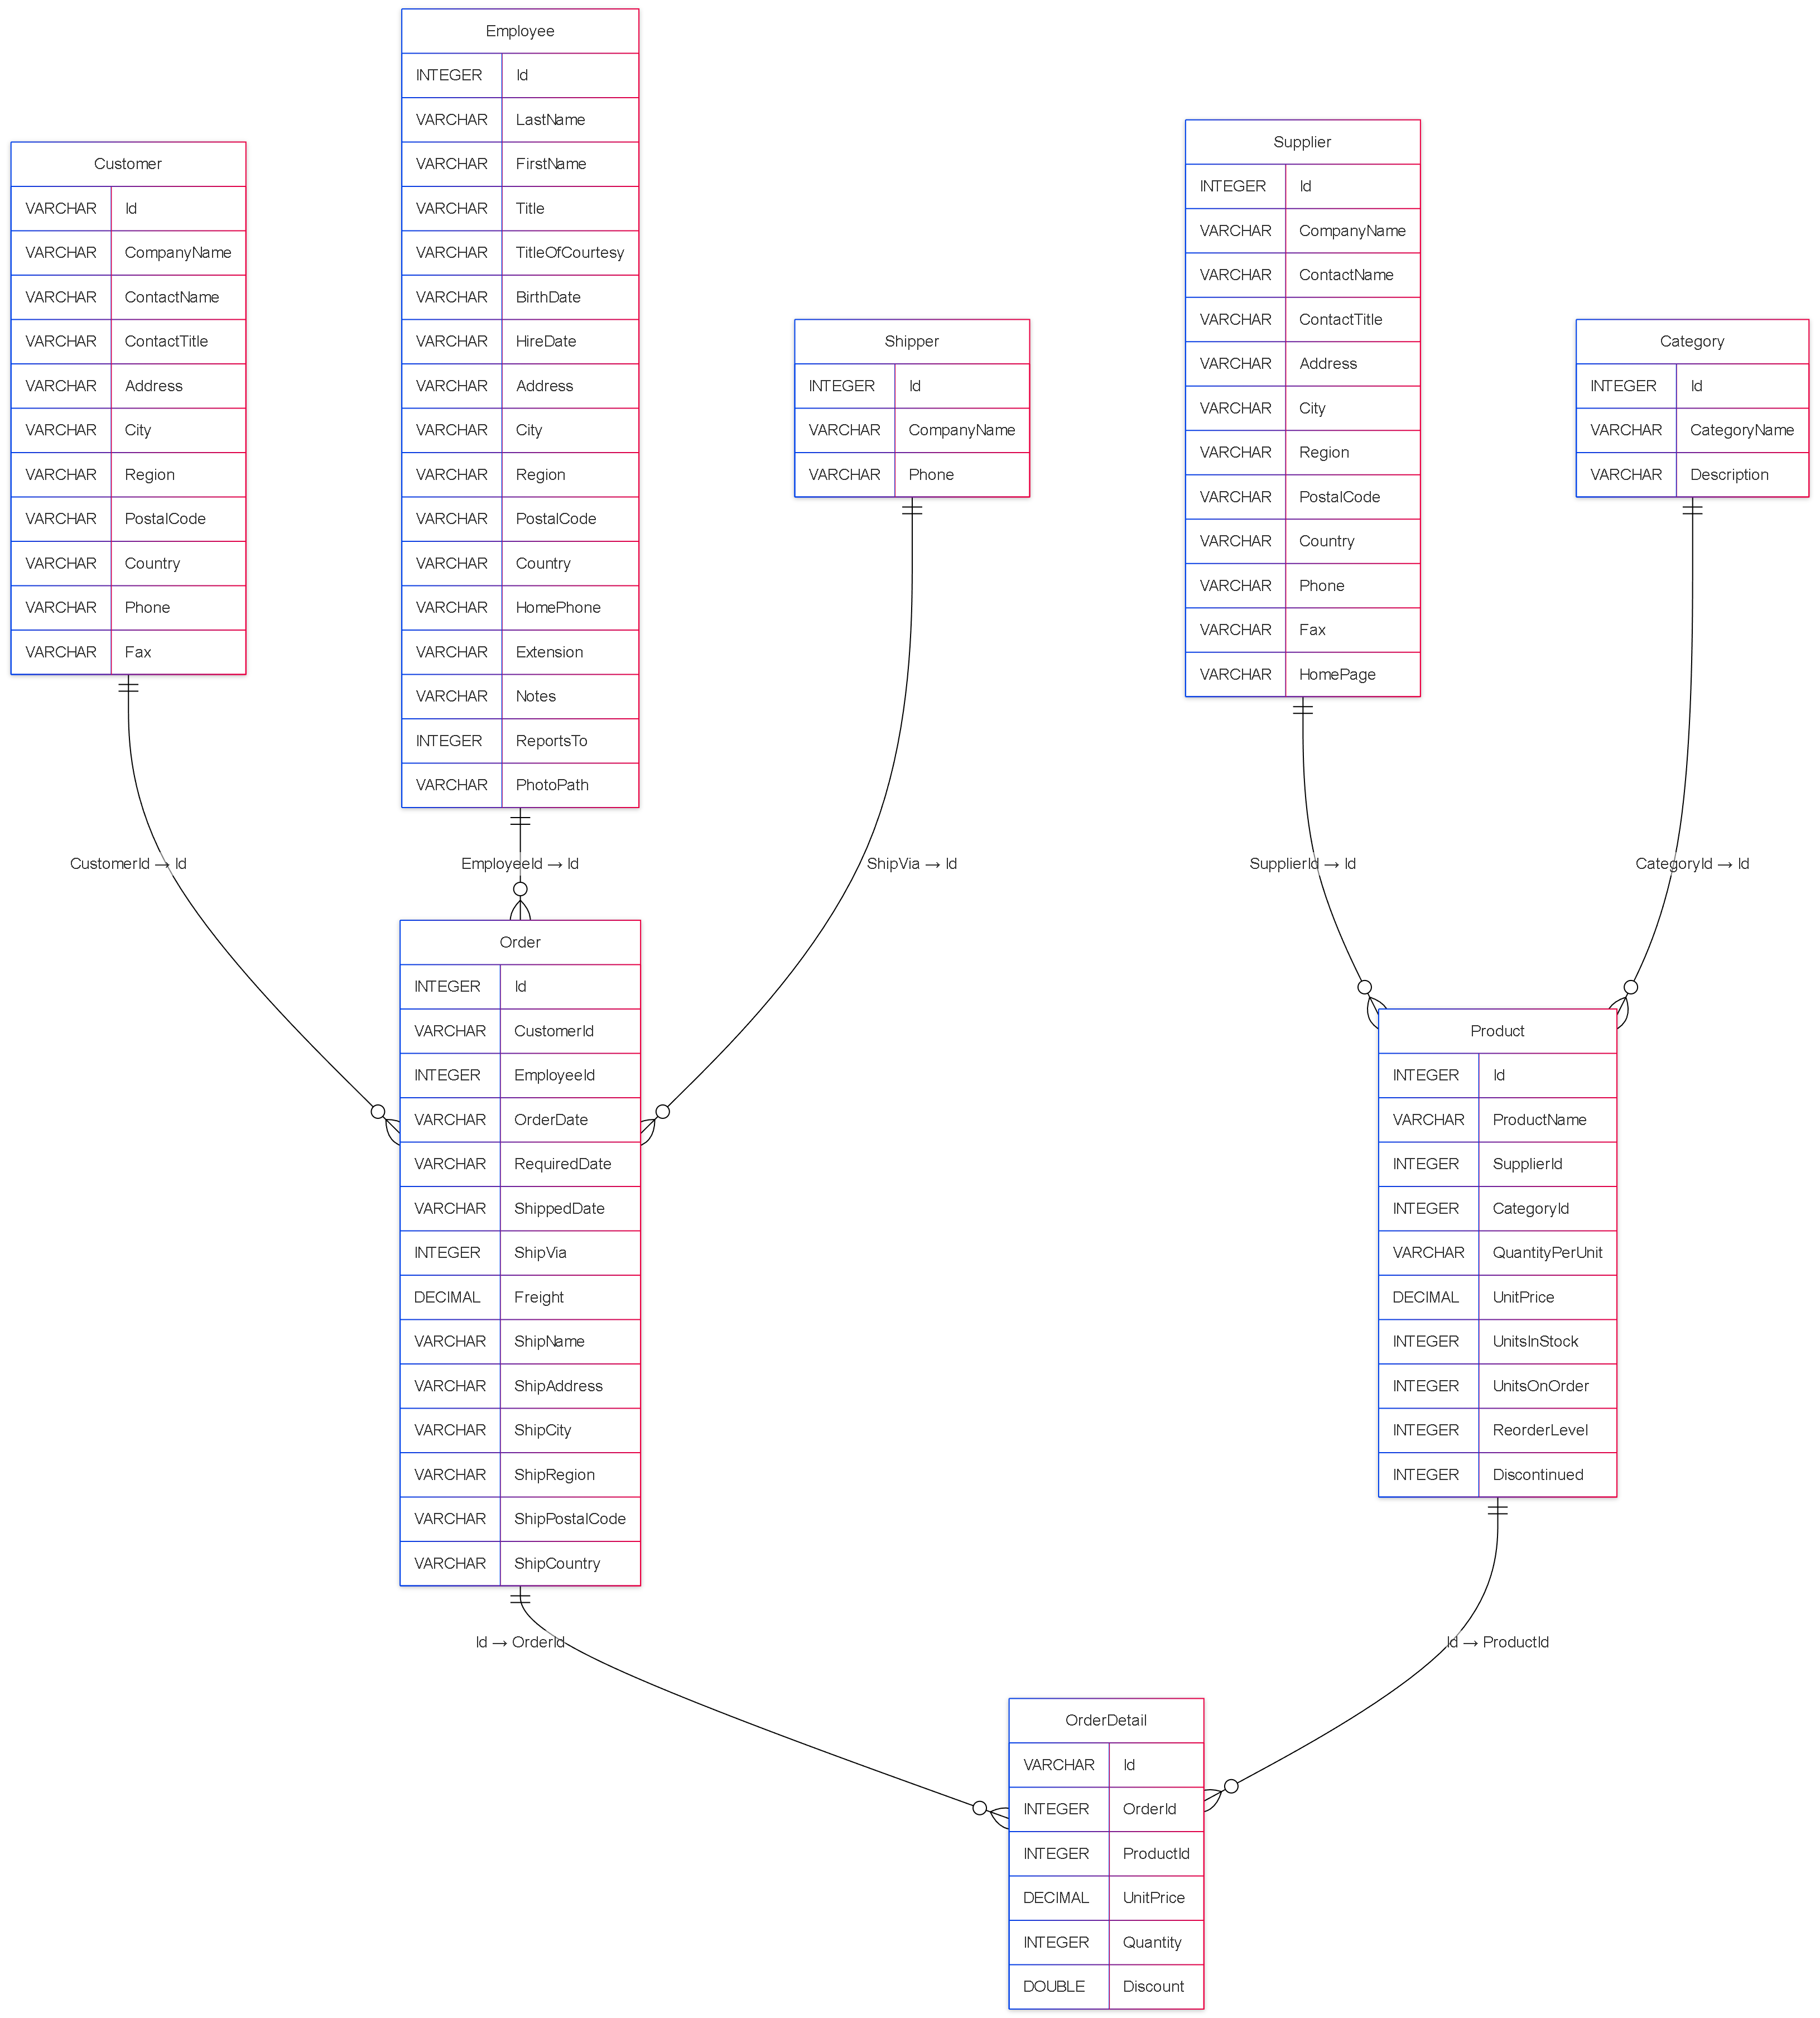

### Exercise 9 – Customer acquisition cohorts (by first order year)

**Goal:**
- For each customer, find the **year of their first order** (`FirstOrderYear`).
- Then, for each `FirstOrderYear`, compute:
  - Number of customers acquired
  - Total sales from those customers (across all years)

Return columns: `FirstOrderYear`, `CustomerCount`, `TotalSales`.

**Hints:**
- First, create a subquery that finds `MIN(OrderDate)` per `CustomerId` and extracts the year.
- Then join that with aggregated sales per customer (or join back to order lines).
- Group by `FirstOrderYear`.

In [ ]:
sql_ex9 = """
WITH CustomerFirstOrder AS (
    SELECT
        CustomerId,
        strftime('%Y', MIN(OrderDate)) AS FirstOrderYear
    FROM "Order"
    GROUP BY CustomerId
)
SELECT
    cfo.FirstOrderYear,
    COUNT(DISTINCT cfo.CustomerId) AS CustomerCount,
    SUM(od.UnitPrice * od.Quantity * (1 - od.Discount)) AS TotalSales
FROM CustomerFirstOrder cfo , "Order" o, "OrderDetail" od
WHERE cfo.CustomerId = o.CustomerId
AND o.Id = od.OrderId
GROUP BY cfo.FirstOrderYear
"""

df_ex9 = pd.read_sql_query(sql_ex9, conn)
df_ex9

,FirstOrderYear,CustomerCount,TotalSales
0,2012,67,1.163223e+06
1,2013,21,1.005781e+05
2,2014,1,1.992050e+03


### Exercise 10 – Sales heatmap by year and country (advanced)

**Goal:**
- Build a table of **total sales** by `(Year, Country)`.
- Pivot it into a matrix (rows = Year, columns = Country) in pandas.
- Visualize it as a simple heatmap using `plt.imshow`.

**Hints:**
- In SQL:
  - Extract `Year` with `strftime('%Y', o.OrderDate)`.
  - Group by `Year` and `Country` (from `Customer` or `Order.ShipCountry`).
- In pandas:
  - Use `pivot_table(index='Year', columns='Country', values='TotalSales', fill_value=0)`.
  - Then plot with `plt.imshow` and add a colorbar.

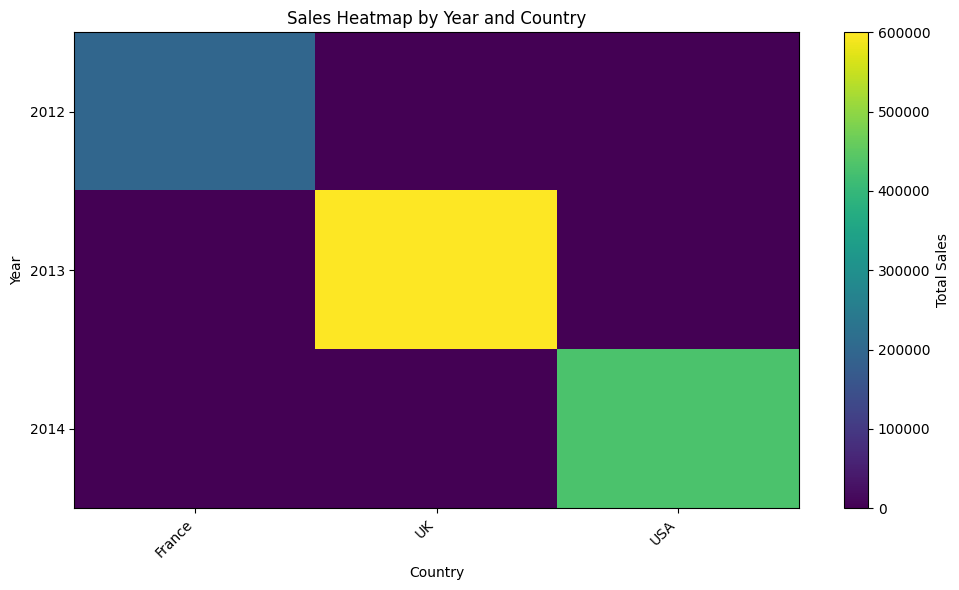

In [ ]:
# TODO: Exercise 10
sql_ex10 = """
SELECT strftime('%Y', o.OrderDate) AS Year, c.Country,
      sum(od.UnitPrice * od.Quantity * (1 - od.Discount)) AS TotalSales
FROM "Order" o , "OrderDetail" od, "Customer" c
WHERE o.Id = od.OrderId AND o.CustomerId = c.Id
GROUP BY Year
"""

df_ex10 = pd.read_sql_query(sql_ex10, conn)
df_ex10.head()


# Example pivot + heatmap scaffold:
if not df_ex10.empty:
    pivot = df_ex10.pivot_table(index='Year', columns='Country', values='TotalSales', fill_value=0)
    plt.figure(figsize=(10, 6))
    plt.imshow(pivot.values, aspect='auto')
    plt.title('Sales Heatmap by Year and Country')
    plt.xlabel('Country')
    plt.ylabel('Year')
    plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45, ha='right')
    plt.yticks(range(len(pivot.index)), pivot.index)
    plt.colorbar(label='Total Sales')
    plt.tight_layout()
    plt.show()
